In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**University of Edinburgh**

**School of Mathematics**

**Bayesian Data Analysis, 2020/2021, Semester 2**

**Daniel Paulin & Nicolò Margaritella**

**R scripts for Lecture 2**

In [2]:
#This code loads a compiled version of JAGS and rjags from a zip file on Google Drive, and loads rjags. It should only take a few seconds.
#IMPORTANT: Go to the Kaggle Settings (right hand side) and enable the Internet option before running this.
system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=1i7BlQ21kT4ZnYUjAxa8P-eCbe-Zfiz8j' -O /kaggle/working/kaggle_JAGS.zip")
system("unzip /kaggle/working/kaggle_JAGS.zip")
system("rm /kaggle/working/kaggle_JAGS.zip")
system("cd /kaggle/working/JAGS-4.3.0")
system("make install")
library(rjags,lib.loc="/kaggle/working")
#If it ran correctly, you should see 
#Loading required package: coda
#Linked to JAGS 4.3.0
#Loaded modules: basemod,bugs

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



# **Normally distributed data with both mean and variance unknown**

In [3]:
#JAGS script for normally distributed data with both mean and variance unknown
require(rjags)

#generate data (the same we have used for the Gibbs sampler example)
set.seed(123)
n=150; y=rnorm(n,2,3)

#Prior information for the mean and variance. 
#Note that in the BUGS language the normal dist. is parameterised in terms of the precision=1/variance
mu0=0; sigma02=100; a=0.1; b=0.1

#writing the model, in essence similar syntax to WinBUGS/OpenBUGS
model_string <- "model{

  # Likelihood
  for(i in 1:n){
    y[i]~dnorm(mu,inv.var)
  }

  # Prior for mu
  mu~dnorm(mu0,inv.var0)
  inv.var0=1/sigma02

  # Prior for the inverse variance
  inv.var~dgamma(a, b)

  # Compute the variance
  sigma2=1/inv.var
}"

#data
data=list(y=y,n=n,mu0=mu0,sigma02=sigma02,a=a,b=b)

#list of initial values (if not supplied, the function jags.model will generate initial values)
inits=list(list(mu=mean(y),inv.var=1/var(y)), list(mu=0,inv.var=1), list(mu=10,inv.var=0.1))

#passing the model to jags *format*
model=jags.model(textConnection(model_string),n.chains=3,data=data,inits=inits)

#Burnin of 1000 samples
update(model,1000,progress.bar="none")

# Running the model
res=coda.samples(model,variable.names=c("mu","sigma2"),n.iter=10000, progress.bar="none")

#summary of the results (posterior mean, std deviation, quantiles,ect)
summary(res)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 150
   Unobserved stochastic nodes: 2
   Total graph size: 160

Initializing model




Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 3 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

        Mean     SD Naive SE Time-series SE
mu     1.925 0.2332 0.001346       0.001346
sigma2 8.219 0.9634 0.005562       0.005598

2. Quantiles for each variable:

        2.5%   25%   50%   75% 97.5%
mu     1.467 1.768 1.926 2.081  2.38
sigma2 6.545 7.543 8.142 8.815 10.32


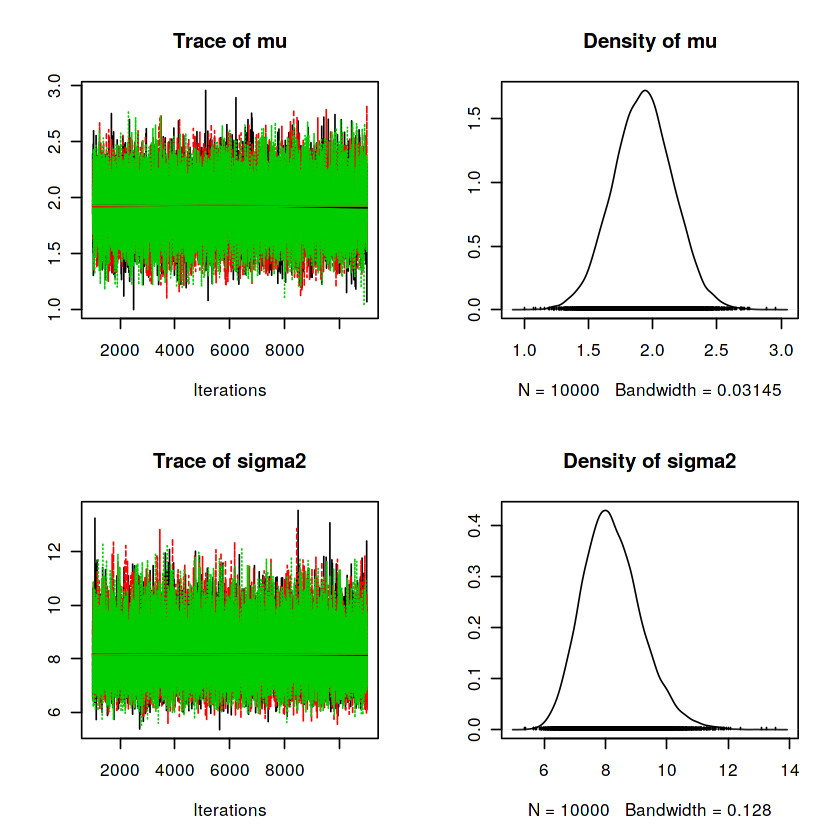

In [4]:
#trace and density plots for each of the parameters monitored (mu and sigma2 in this case)
plot(res)


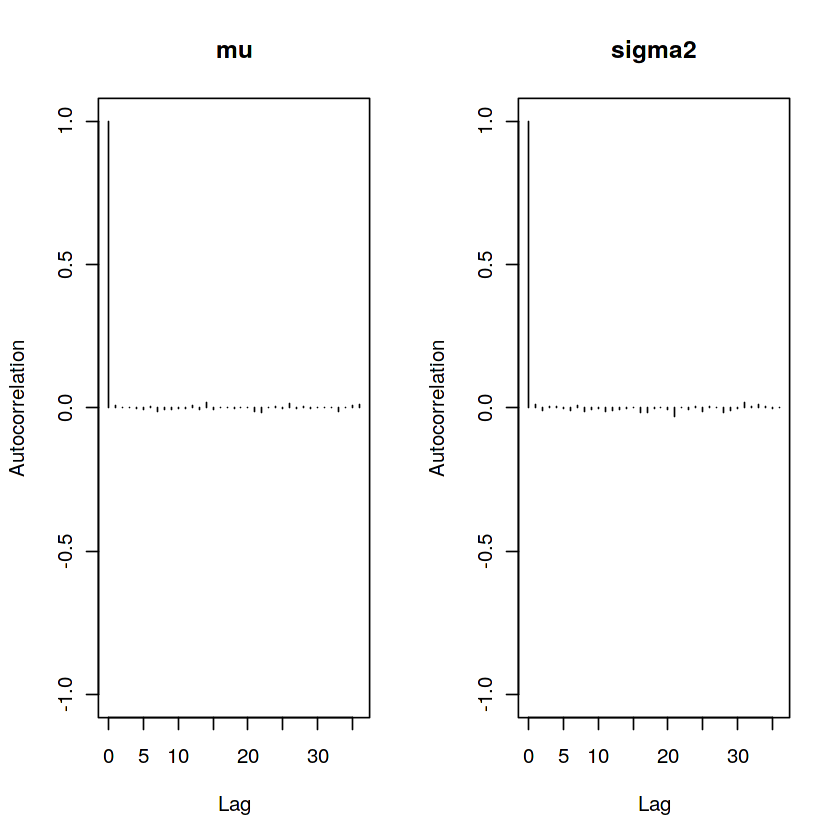

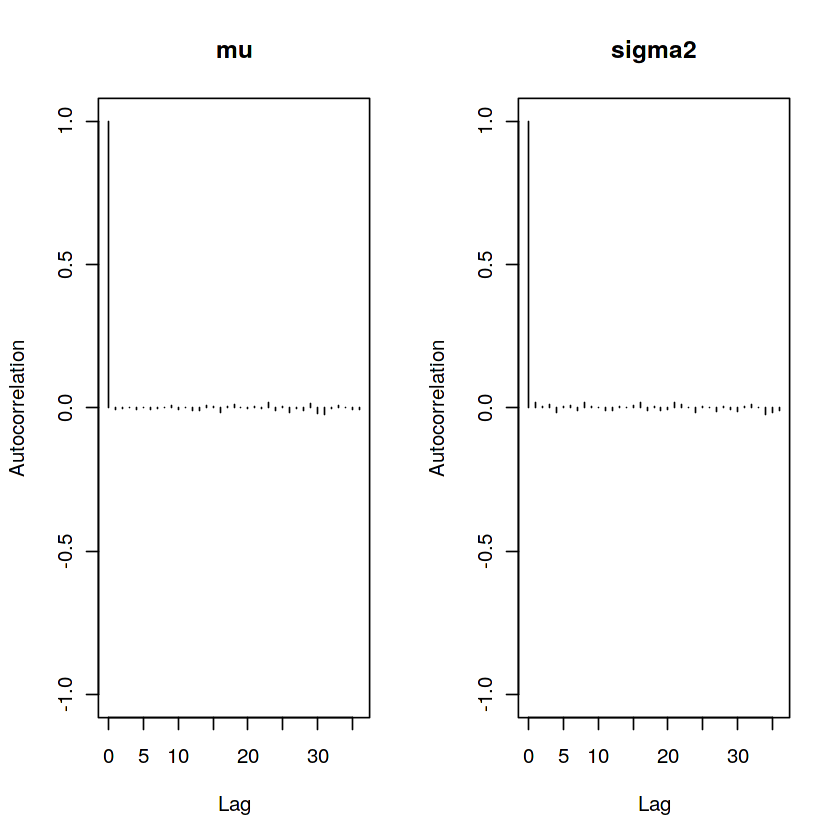

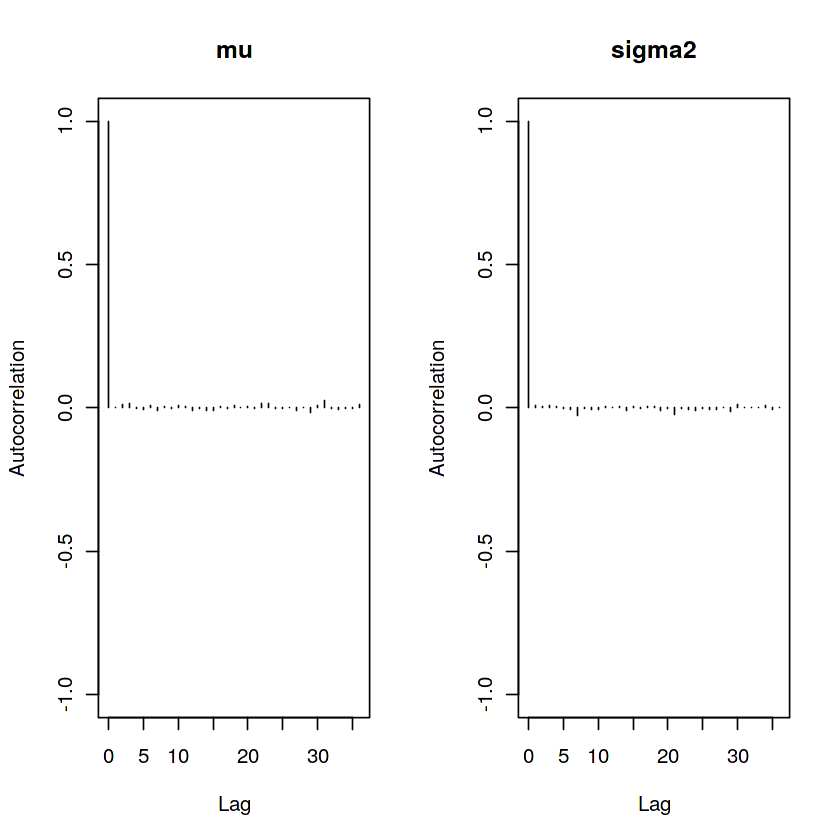

In [5]:
#autocorrelation function
autocorr.plot(res)

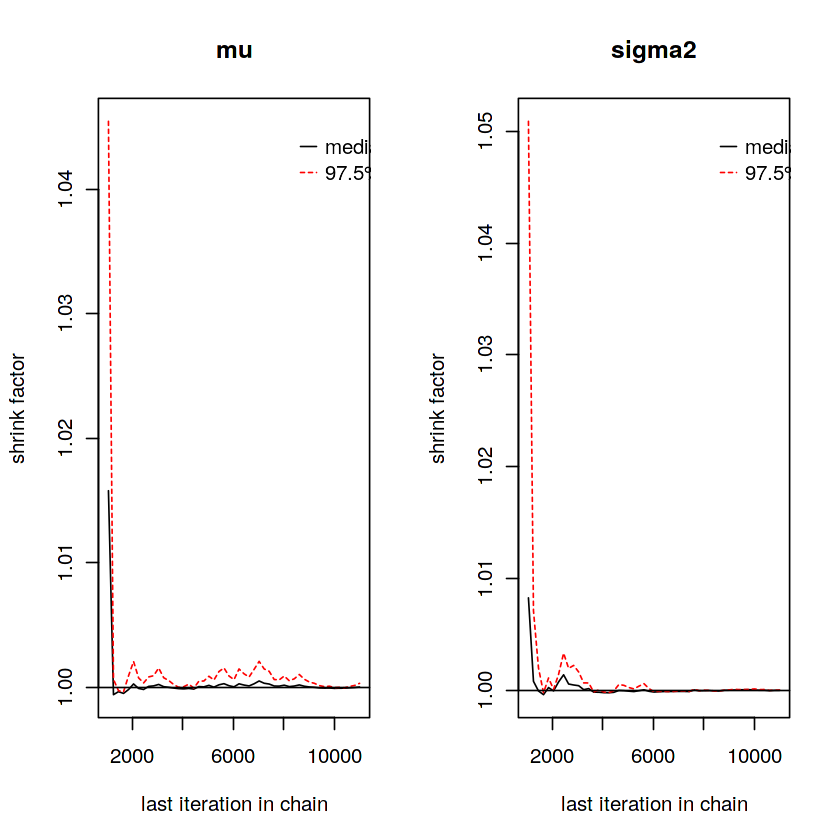

In [6]:

#gelman rubin statistic (only works when number of chains >=2)
gelman.plot(res)

In [7]:
#extracting the chains for mu and sigma 2
str(res)
#mu for chain 1
res[[1]][,1]
#sigma2 for chain 3
res[[3]][,2]

List of 3
 $ : 'mcmc' num [1:10000, 1:2] 2.39 2.07 1.96 1.84 2 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "mu" "sigma2"
  ..- attr(*, "mcpar")= num [1:3] 1001 11000 1
 $ : 'mcmc' num [1:10000, 1:2] 1.89 1.85 1.87 1.97 2.13 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "mu" "sigma2"
  ..- attr(*, "mcpar")= num [1:3] 1001 11000 1
 $ : 'mcmc' num [1:10000, 1:2] 1.97 1.76 1.99 2.09 1.83 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "mu" "sigma2"
  ..- attr(*, "mcpar")= num [1:3] 1001 11000 1
 - attr(*, "class")= chr "mcmc.list"


Markov Chain Monte Carlo (MCMC) output:
Start = 1001 
End = 11000 
Thinning interval = 1 
    [1] 2.388976 2.068273 1.955707 1.841312 2.003817 2.105141 1.560896 1.716498
    [9] 1.983693 2.358692 2.017117 1.696420 1.998676 1.716642 2.214175 1.504137
   [17] 2.110840 2.398753 1.860126 2.475155 1.769396 1.757373 2.030034 2.283426
   [25] 1.973425 1.307507 2.126557 1.636781 2.089372 2.137666 2.260316 1.935371
   [33] 1.915090 1.884665 2.594440 1.560627 2.190359 1.957958 1.986175 1.654016
   [41] 1.964322 2.033610 1.501903 2.222279 2.341122 1.727401 2.087912 2.005191
   [49] 1.847331 1.984794 1.938412 1.903137 1.951376 1.896429 1.949879 1.717105
   [57] 2.087762 2.264183 2.049131 2.001240 1.666524 2.268593 2.141098 1.895525
   [65] 1.852824 2.307359 1.660754 1.760634 1.948691 1.611554 1.701631 2.132819
   [73] 1.895277 1.885925 1.972273 2.319397 1.961883 2.155663 1.617854 2.123433
   [81] 2.043784 2.124303 1.895271 1.929546 1.724871 2.023998 2.049335 2.355414
   [89] 2.354915 1.632816 2.07

Markov Chain Monte Carlo (MCMC) output:
Start = 1001 
End = 11000 
Thinning interval = 1 
    [1]  6.445380  7.440254  7.788488  7.024655  7.867447  7.888630  8.675140
    [8]  7.535356  6.761237  8.839508  8.336409  8.017563  7.195762  8.524704
   [15]  8.788745  9.828577  9.386594  6.477384  7.207568  7.353268  8.022526
   [22]  6.199777  9.078439  8.476143  8.140625 10.860865  7.446745  9.080109
   [29]  8.027129  9.035864 10.052595  7.514107  8.914983  8.625677  8.124682
   [36]  8.170560  7.736652  8.420119 10.486331  8.735005  6.220489  8.274626
   [43]  7.364048  7.657530  8.199161  6.797209  7.969034  8.151277  7.531614
   [50]  7.930099  7.262355  9.289472  7.611783  7.459282  9.647812  8.895147
   [57]  7.661010  8.817289  9.952740  7.839210  7.270832  9.304103  7.297509
   [64]  8.700568 10.149621  7.888495  8.609947  7.679144  7.265222  8.594039
   [71]  8.936190 10.586395  7.921261  7.050296  7.711710 10.005984  8.204426
   [78]  7.422882  8.263263  8.370732  7.917296  9.4

# **mtcars example**

In [58]:
#mtcars example
#First fit the standard frequentist linear statistical model
data(mtcars)
#help(mtcars)
#creating a new dataframe with only mpg,drat,wt, and qsec as variables
mtcars1=mtcars[c("mpg","drat","wt","qsec")]

#It is also possible to arrive at the same result by excluding the other variables
#vars=names(mtcars)%in%c("cyl", "disp", "hp", "vs","am","gear","carb") 
#variables to exclude
#mtcars1=mtcars[!vars]


fit=lm(mpg~drat+wt+qsec,data=mtcars1)
summary(fit)


Call:
lm(formula = mpg ~ drat + wt + qsec, data = mtcars1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1152 -1.8273 -0.2696  1.0502  5.5010 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.3945     8.0689   1.412  0.16892    
drat          1.6561     1.2269   1.350  0.18789    
wt           -4.3978     0.6781  -6.485 5.01e-07 ***
qsec          0.9462     0.2616   3.616  0.00116 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.56 on 28 degrees of freedom
Multiple R-squared:  0.837,	Adjusted R-squared:  0.8196 
F-statistic: 47.93 on 3 and 28 DF,  p-value: 3.723e-11


In [39]:

#mtcars example - please run the code in the cell above to load the data

#Now fit the Bayesian version of the model using JAGS
require(rjags)

#covariates and response
y=mtcars1$mpg; drat=mtcars1$drat; wt=mtcars1$wt; qsec=mtcars1$qsec
#n is the number of cars in the dataset, 32 in this case
n=nrow(mtcars1)

#The following line centers the covariates, but keeps the response unchanged 
#y=mtcars1$mpg; drat=mtcars1$drat-mean(mtcars1$drat); wt=mtcars1$wt-mean(mtcars1$wt); qsec=mtcars1$qsec-mean(mtcars1$qsec)

#model in BUGS language
model_string <- "model{

# Likelihood
for(i in 1:n){
y[i]~dnorm(mu[i],tau)
mu[i]=beta[1]+beta[2]*drat[i]+beta[3]*wt[i]+beta[4]*qsec[i]
}

# Prior for beta
for(j in 1:4){
beta[j]~dnorm(mu0,tau0)
}
tau0=1/sigma02

# Prior for the inverse variance
tau~dgamma(a, b)

# Compute the variance
sigma2=1/tau
}"

#hyperparameters for the betas and tau
mu0=0; sigma02=1000; a=0.1; b=0.1
# list with data and hyperparameters
data=list(y=y,drat=drat,wt=wt,qsec=qsec,n=n,mu0=mu0,sigma02=sigma02,a=a,b=b)

#passing the model to rjags
model=jags.model(textConnection(model_string),n.chains=1,data=data)

#burn-in
update(model,100000,progress.bar="none")
#obtain the samples
resthin=coda.samples(model,variable.names=c("beta","sigma2"),n.iter=500000,thin=50,progress.bar="none")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 32
   Unobserved stochastic nodes: 5
   Total graph size: 254

Initializing model



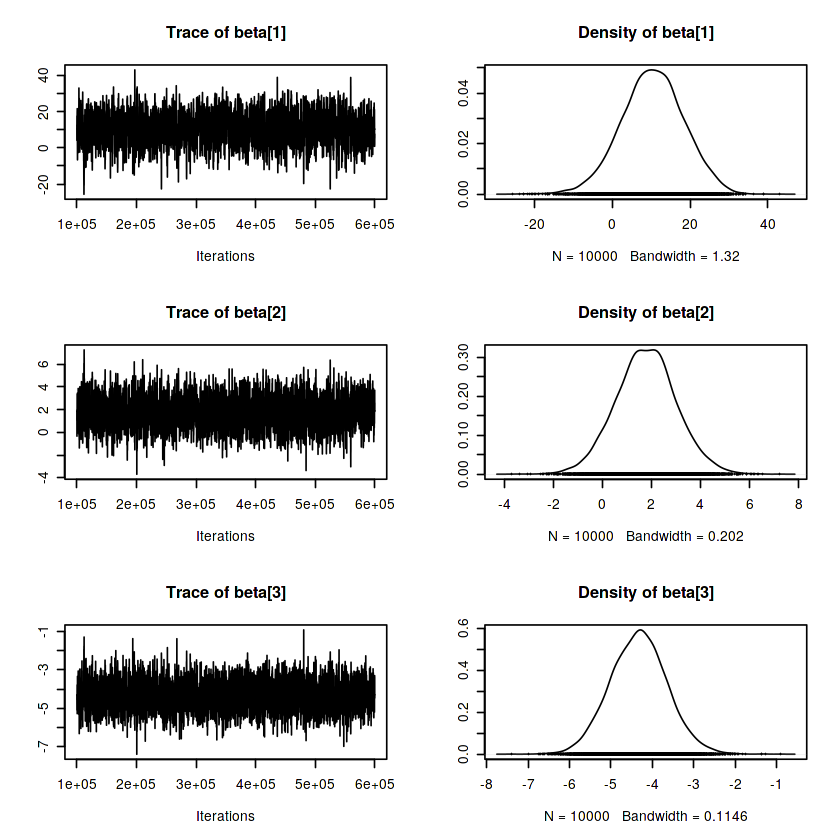

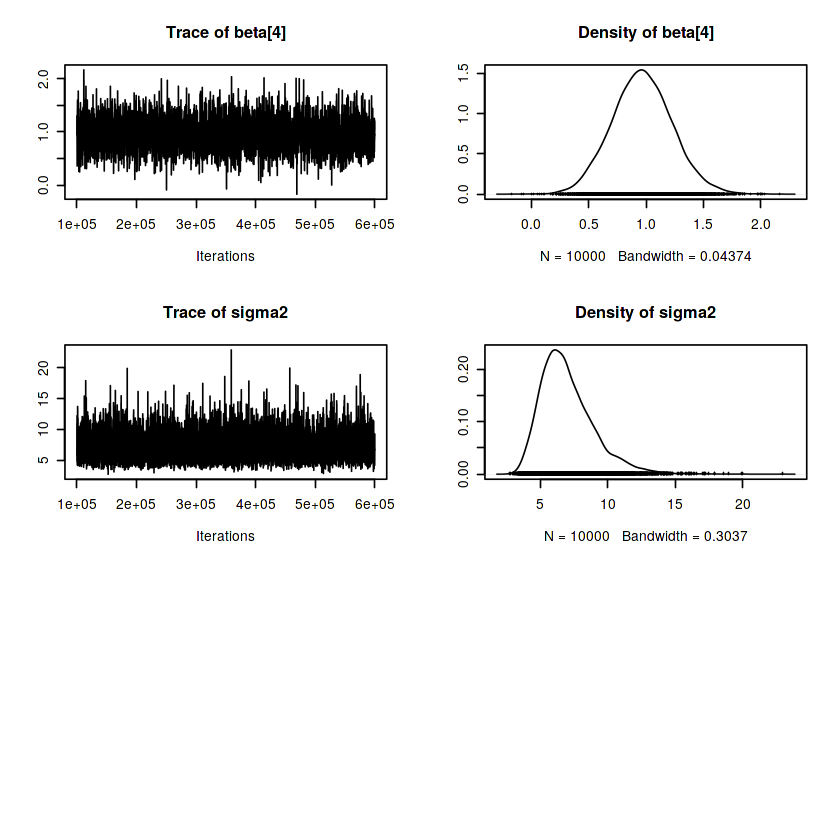

In [10]:
#trace and density plots for each of the parameters monitored
plot(resthin)

In [11]:
effectiveSize(resthin[[1]])
#Computes effective sample sizes for all variables

beta[1]  beta[2]  beta[3]  beta[4]   sigma2 
1247.094 1836.817 2147.320 2283.330 8733.922

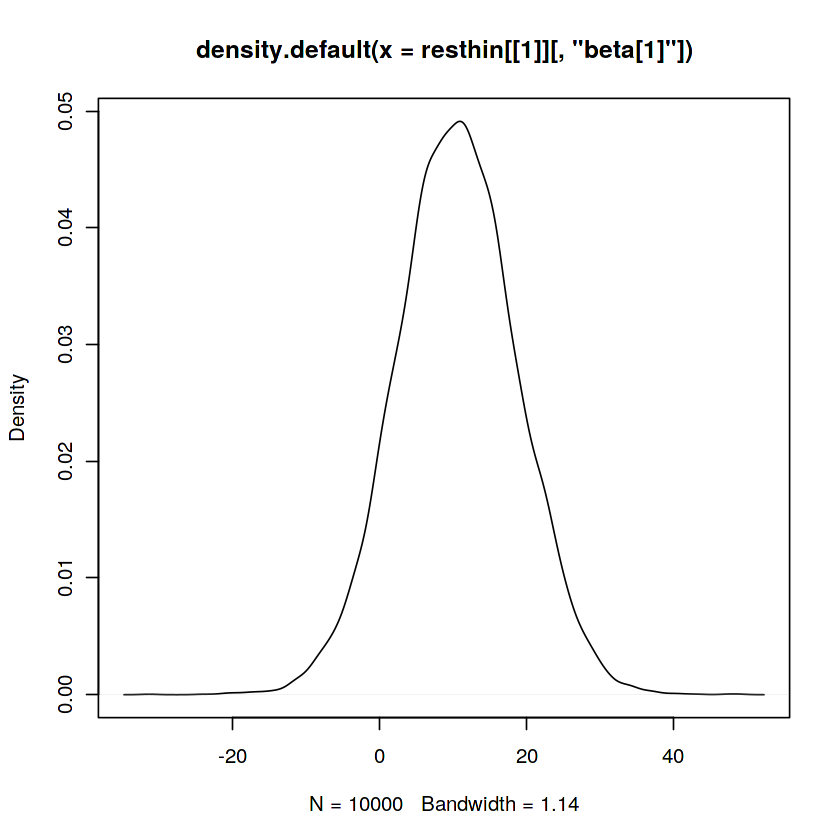

In [49]:
#Plots the posterior density estimates for the 5 parameters
plot(density(resthin[[1]][,"beta[1]"]))

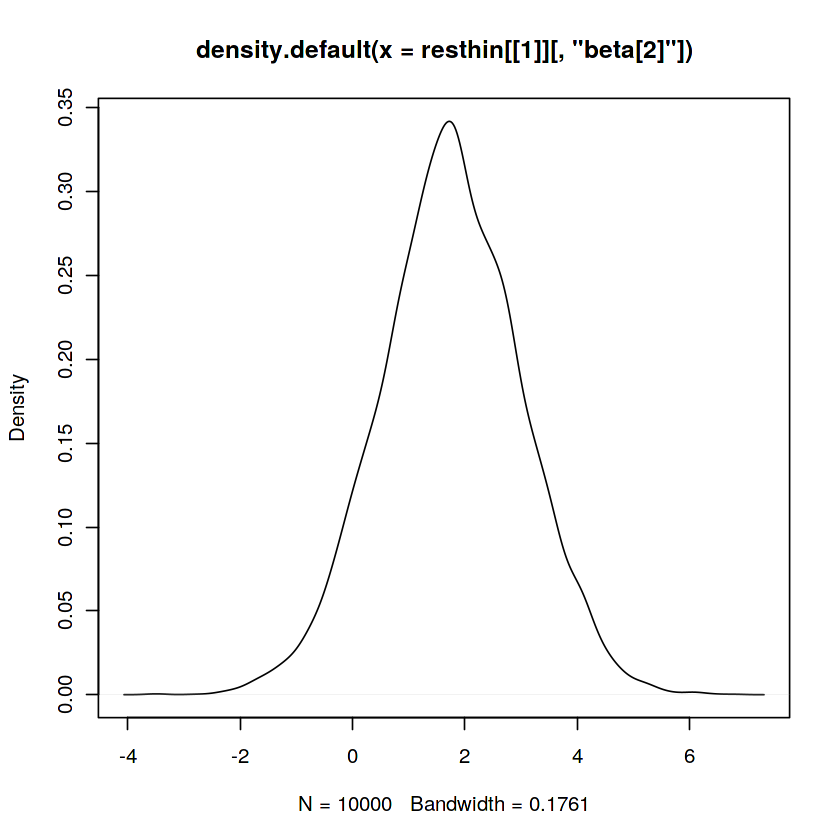

In [50]:
plot(density(resthin[[1]][,"beta[2]"]))


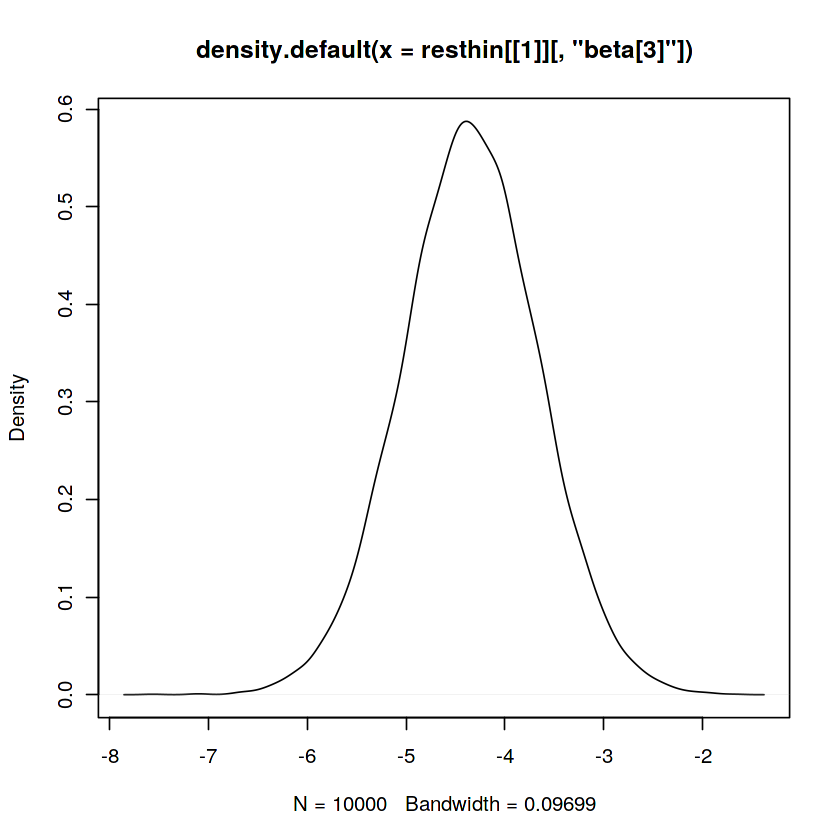

In [51]:
plot(density(resthin[[1]][,"beta[3]"]))


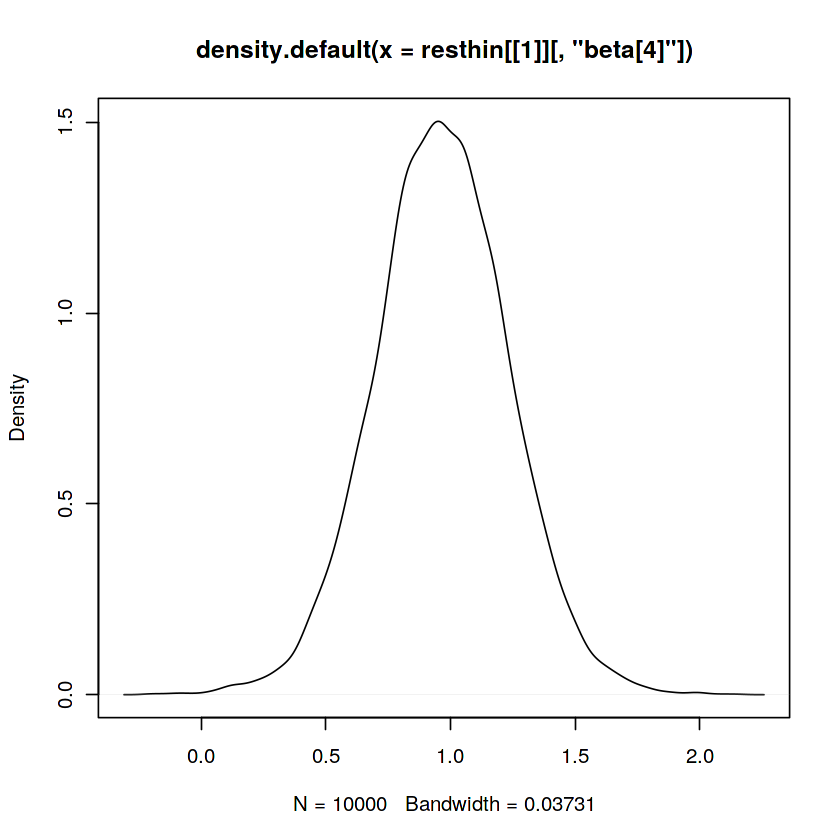

In [52]:
plot(density(resthin[[1]][,"beta[4]"]))

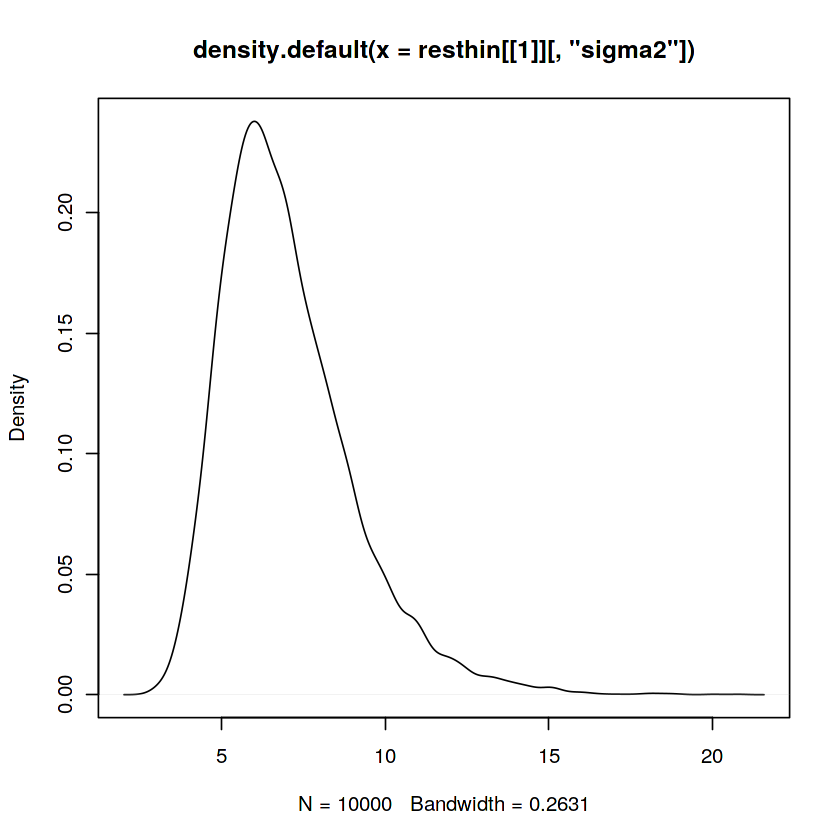

In [53]:
plot(density(resthin[[1]][,"sigma2"]))

# Posterior predictive checks for mtcars dataset

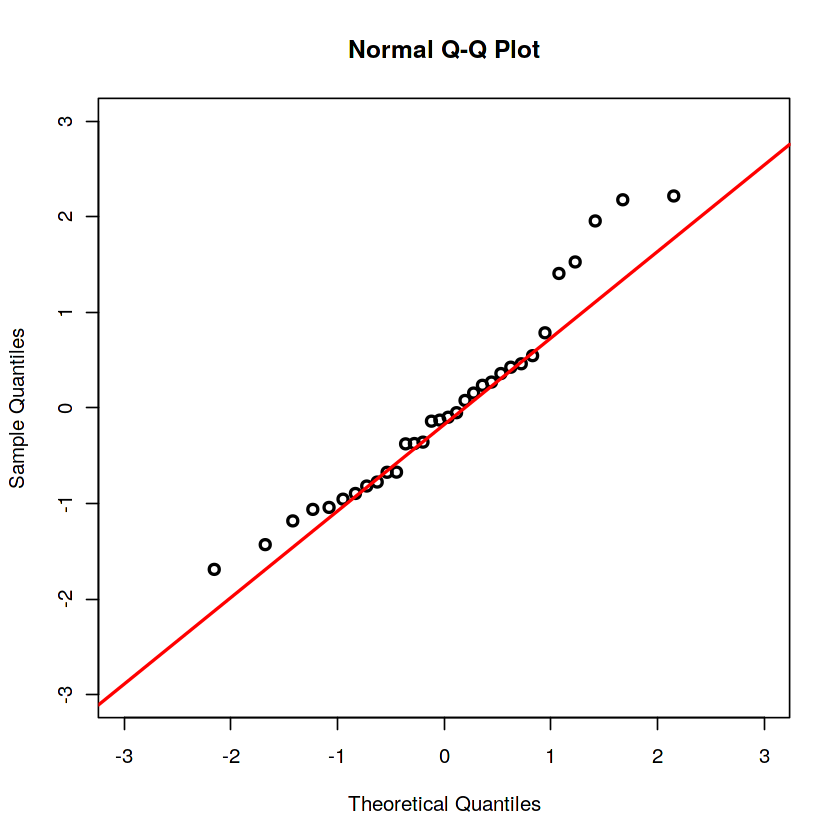

In [56]:
### next section is about checks based on studentised residuals
resmat=as.matrix(resthin)
niterf=nrow(resmat)
beta0=resmat[,1]; beta1=resmat[,2] ;beta2=resmat[,3]; beta3=resmat[,4]; sigma=sqrt(resmat[,5])
x=cbind(rep(1,n),mtcars1$drat,mtcars1$wt,mtcars1$qsec)
H=x%*%solve((t(x)%*%x))%*%t(x)

#fitted values
fittedvalues=matrix(0,nrow=n,ncol=niterf)
for(l in 1:niterf){
fittedvalues[,l]=beta0[l]*x[,1]+beta1[l]*x[,2]+beta2[l]*x[,3]+beta3[l]*x[,4]
}

#studentised residuals
#n denotes the number of data points in the dataset (i.e. number of cars)
#niterf denotes the number of MCMC samples we are using
studentisedred=matrix(0,nrow=n,ncol=niterf)
for(l in 1:niterf){
for(i in 1:n){
studentisedred[i,l]=(y[i]-fittedvalues[i,l])/(sigma[l]*sqrt((1-diag(H)[i]))) 
}  
}  

#posterior mean of studentised residuals
studentisedredm=numeric(n)
for(i in 1:n){
studentisedredm[i]=mean(studentisedred[i,])  
}

#QQ-plot
qqnorm(studentisedredm,xlim=c(-3,3),ylim=c(-3,3),lwd=2)
qqline(studentisedredm,col=2,lwd=2)

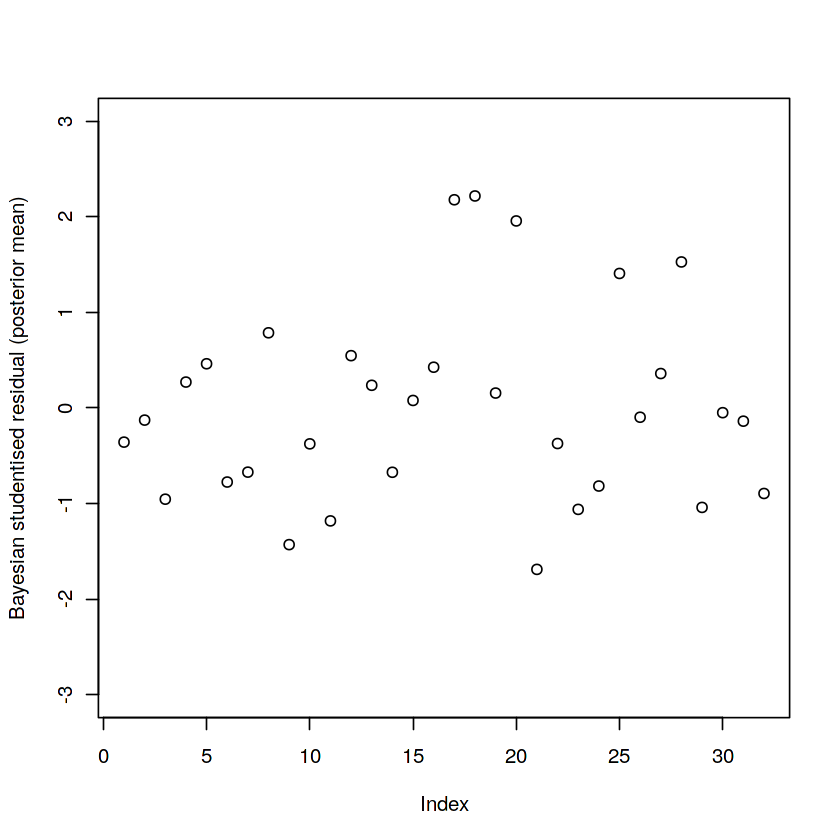

In [48]:
#checking independence of error terms
#seq_along(studentisedredm) creates a vector with the indices of studentisedredm, i.e. 1,2,...,32
#we could also write 1:n instead of seq_along(studentisedredm)
plot(seq_along(studentisedredm),studentisedredm,xlab="Index",ylab="Bayesian studentised residual (posterior mean)",ylim=c(-3,3))

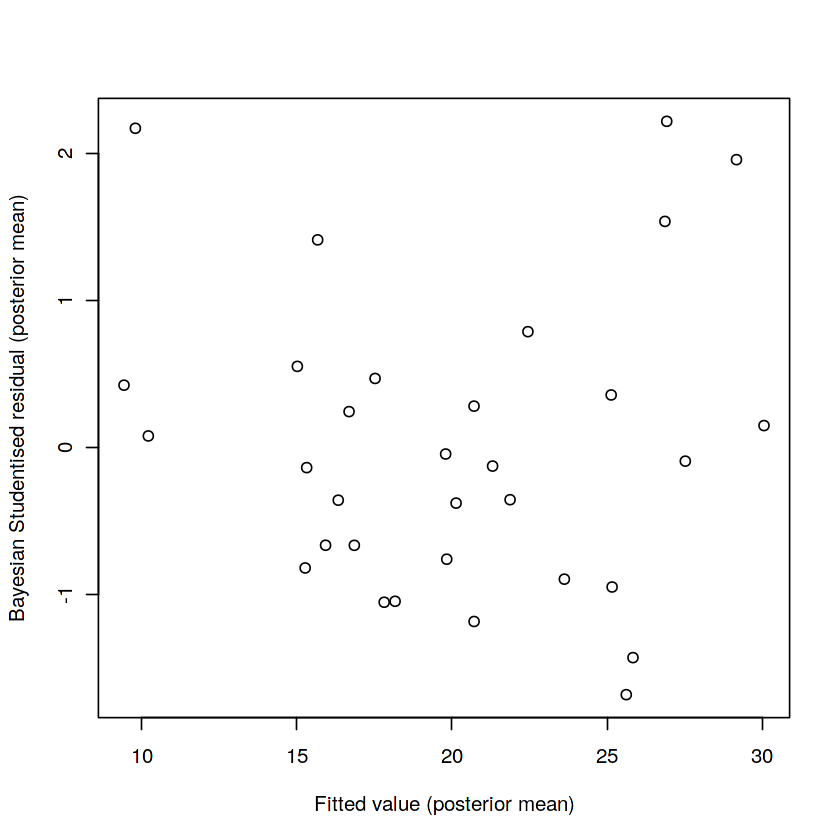

In [15]:
#posterior mean fitted values
fittedvaluesm=numeric(n)
for(i in 1:n){
fittedvaluesm[i]=mean(fittedvalues[i,])  
}

plot(fittedvaluesm,studentisedredm,xlab="Fitted value (posterior mean)",ylab="Bayesian Studentised residual (posterior mean)")


Loading required package: fBasics

Loading required package: timeDate

Loading required package: timeSeries



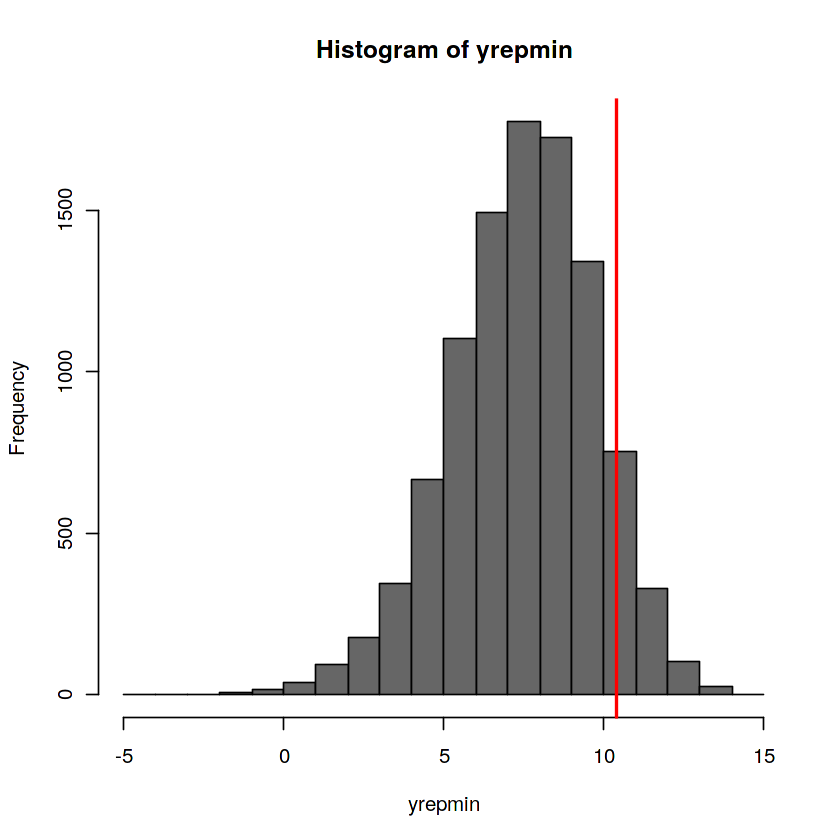

In [16]:
#predictive checks
#replicated data
yrep=matrix(0,nrow=n,ncol=niterf)
for(l in 1:niterf){
for(i in 1:n){
yrep[i,l]=rnorm(1,beta0[l]*x[i,1]+beta1[l]*x[i,2]+beta2[l]*x[i,3]+beta3[l]*x[i,4],sigma[l])  
}  
}

#statistics of interest in this case (and different from the ones included in the model)
yrepmin=apply(yrep,2,min)
yrepmax=apply(yrep,2,max)
yrepmedian=apply(yrep,2,median)
require(fBasics)
yrepskewness=apply(yrep,2,skewness)
yrepkurtosis=apply(yrep,2,kurtosis)

#Predictive checks using replicated data - minimum
hist(yrepmin,col="gray40")
abline(v=min(y),col="red",lwd=2)


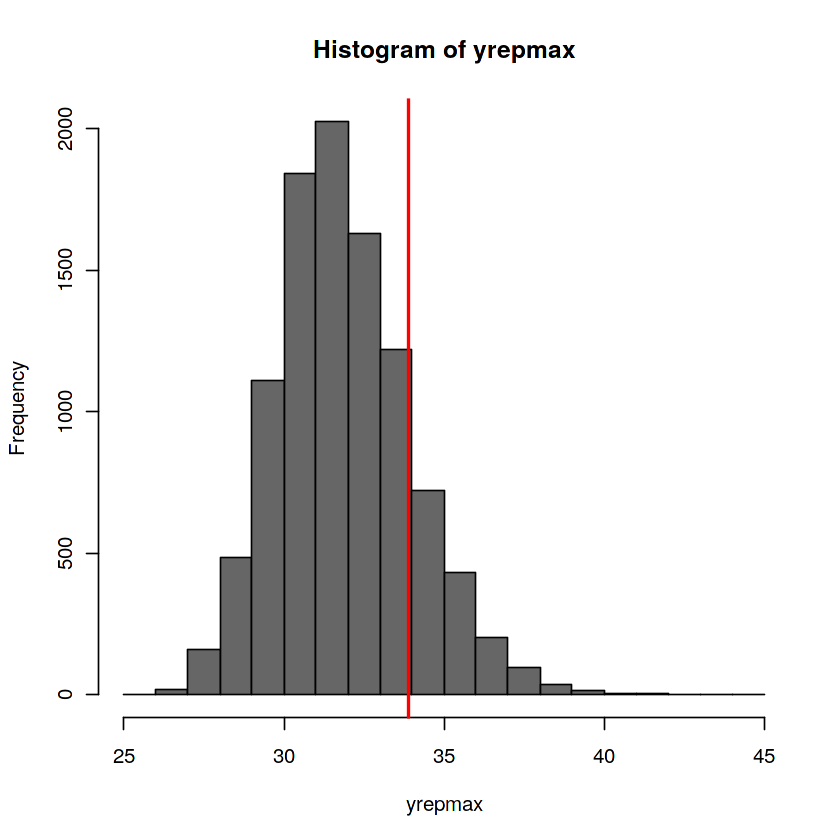

In [17]:

#Predictive checks using replicated data - maximum
hist(yrepmax,col="gray40")
abline(v=max(y),col="red",lwd=2)

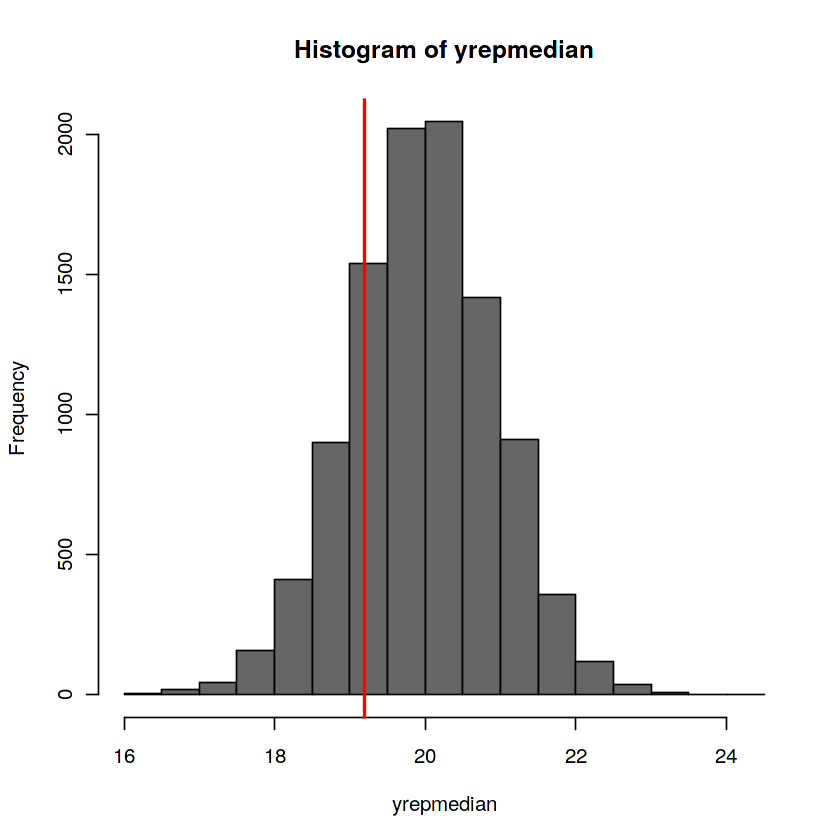

In [18]:
#Predictive checks using replicated data - median
hist(yrepmedian,col="gray40")
abline(v=median(y),col="red",lwd=2)

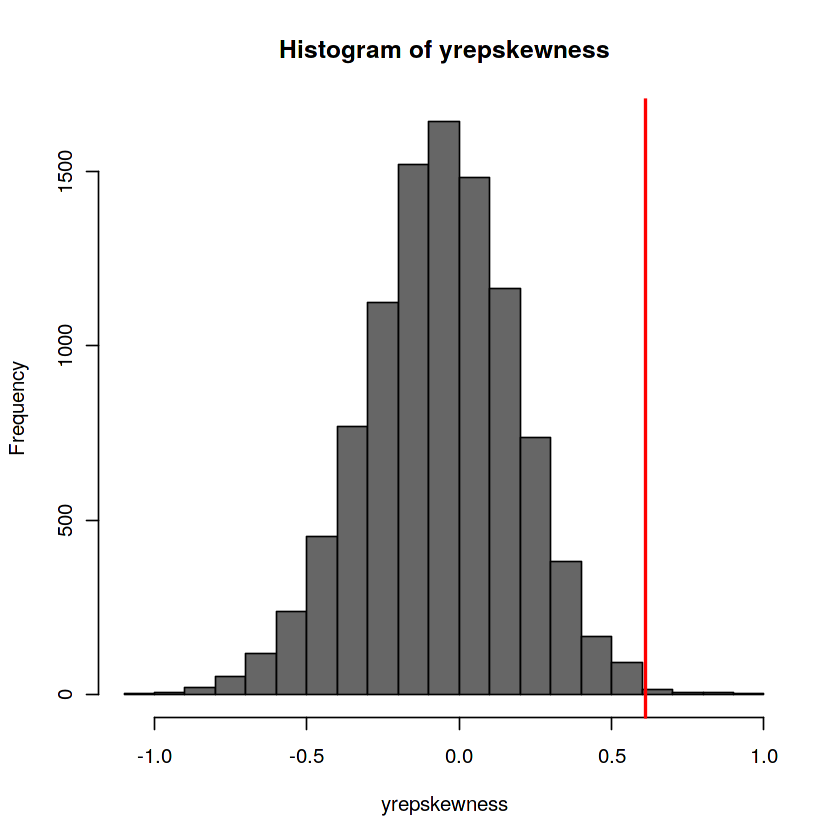

In [19]:
#Predictive checks using replicated data - skewness
hist(yrepskewness,col="gray40")
abline(v=skewness(y),col="red",lwd=2)

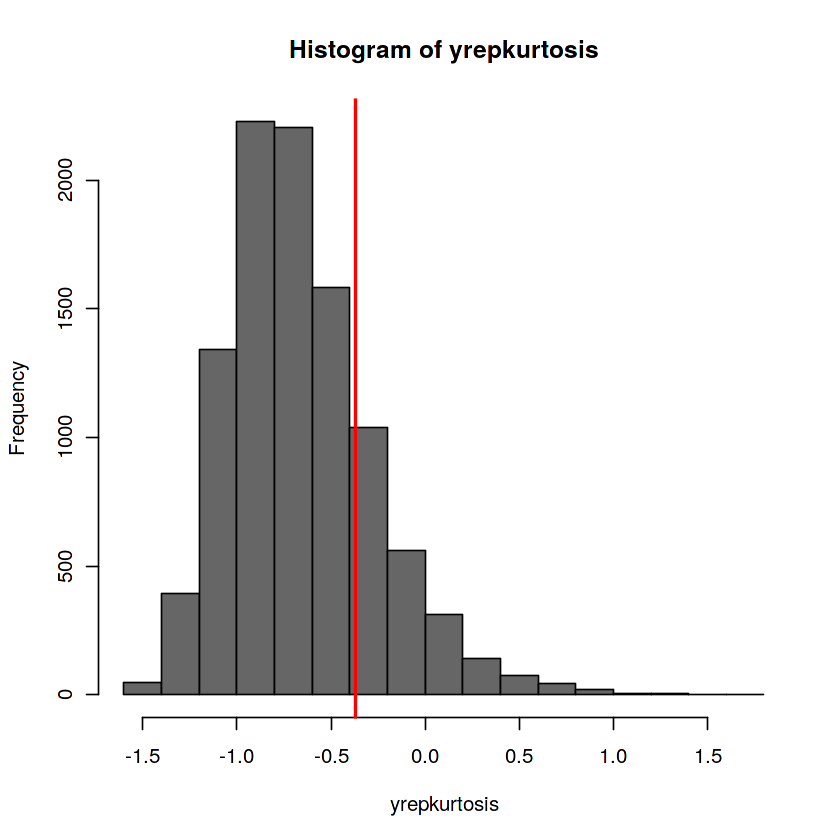

In [20]:

#Predictive checks using replicated data - kurtosis
hist(yrepkurtosis,col="gray40")
abline(v=kurtosis(y),col="red",lwd=2)

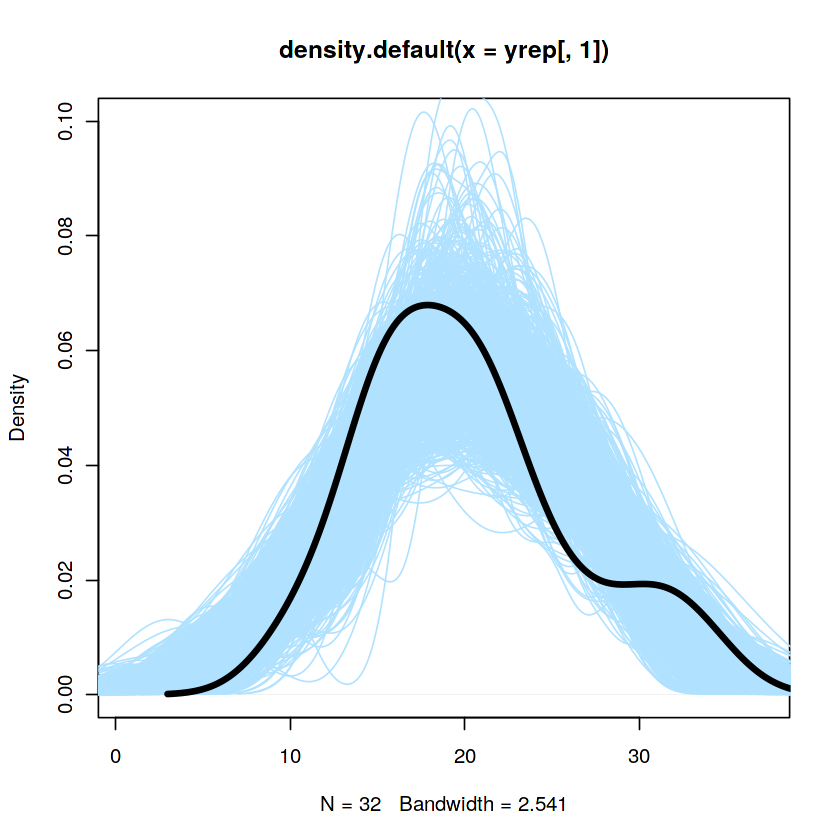

In [21]:
#plot some realisations of the replicated data (response variable) against the density of the observed data
plot(density(yrep[,1]),col="lightskyblue1",ylim=c(0,0.1))
for(i in 2:1000){
lines(density(yrep[,i]),col="lightskyblue1")  
}
lines(density(y),col="black",lwd=4)

# Nonlinear regression - dugongs example

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 27
   Unobserved stochastic nodes: 4
   Total graph size: 126

Initializing model



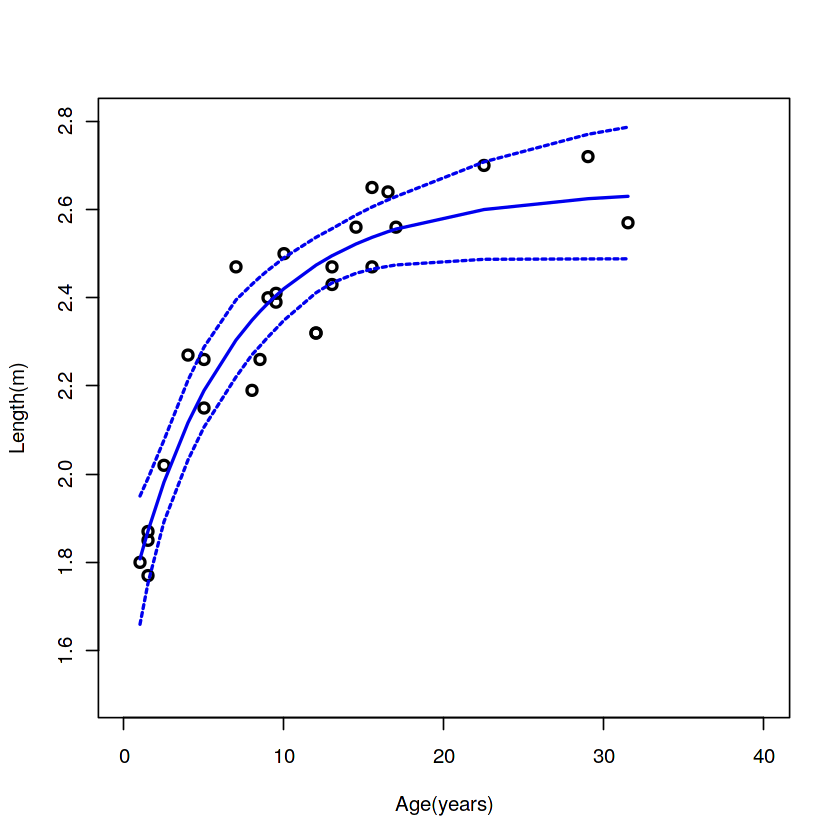

In [22]:
#Nonlinear example - dugongs
#Data
x=c( 1.0,  1.5,  1.5,  1.5, 2.5,   4.0,  5.0,  5.0,   7.0,
       8.0,  8.5,  9.0,  9.5, 9.5,  10.0, 12.0, 12.0,  13.0,
       13.0, 14.5, 15.5, 15.5, 16.5, 17.0, 22.5, 29.0, 31.5)

y=c(1.80, 1.85, 1.87, 1.77, 2.02, 2.27, 2.15, 2.26, 2.47,
      2.19, 2.26, 2.40, 2.39, 2.41, 2.50, 2.32, 2.32, 2.43,
      2.47, 2.56, 2.65, 2.47, 2.64, 2.56, 2.70, 2.72, 2.57)

n=length(y)

#Model in JAGS
model_string <- "model{
# Likelihood
for(i in 1:n){
y[i]~dnorm(mu[i],tau)
mu[i]=alpha-beta*pow(gamma,x[i])
}

alpha~dunif(0,10)

beta~dunif(0,10)

gamma~dunif(0.5,1)

# Prior for the inverse variance
tau~dgamma(a, b)

# Compute the variance
sigma2=1/tau
}"


a=0.1; b=0.1
data=list(y=y,x=x,n=n,a=a,b=b)
model=jags.model(textConnection(model_string),n.chains=1,data=data)
update(model,1000,progress.bar="none")
resnl=coda.samples(model,variable.names=c("alpha","beta","gamma","sigma2"),n.iter=50000,thin=40,progress.bar="none")
#summary(resnl)
#autocorr.plot(resnl)
#effectiveSize(resnl[[1]])

alpha=resnl[[1]][,"alpha"]
beta=resnl[[1]][,"beta"]
gamma=resnl[[1]][,"gamma"]
niters=length(alpha)

#fitted values
fitted=matrix(0,nrow=n,ncol=niters)
for(l in 1:niters){
fitted[,l]=alpha[l]-beta[l]*(gamma[l]^x)  
}

ql=function(x){quantile(x,0.025)}; qh=function(x){quantile(x,0.975)}
fittedm=apply(fitted,1,mean); fittedl=apply(fitted,1,ql); fittedh=apply(fitted,1,qh)

plot(x,y,xlim=c(0,40),ylim=c(1.5,2.8),xlab="Age(years)",ylab="Length(m)",lwd=2)
lines(x,fittedm,type="l",col="blue2",lwd=2)
lines(x,fittedl,type="l",col="blue2",lty=2,lwd=2)
lines(x,fittedh,type="l",col="blue2",lty=2,lwd=2)


# Robustifying linear regression - Hills example

In [23]:
#The following code downloads hills.txt from a Google docs file.
#You can also add it manually by clicking on File / Add or upload data (from Learn)
system("wget --no-check-certificate -r 'https://docs.google.com/uc?export=download&id=14E8BXmznTLrkSGCb9xrqe2fo1fXe6Enb' -O /kaggle/working/hills.txt")

In [24]:
#Robust linear regression - Hills example
hills=read.table("hills.txt",header=TRUE)
y=hills$time; climb=hills$climb; dist=hills$dist
n=nrow(hills)

#normal errors
model_string <- "model{
# Likelihood
for(i in 1:n){
y[i]~dnorm(mu[i],tau)
mu[i]=beta[1]+beta[2]*climb[i]+beta[3]*dist[i]
}

# Prior for beta
for(j in 1:3){
beta[j]~dnorm(mu0,tau0)
}
tau0=1/sigma02

# Prior for the inverse variance
tau~dgamma(a, b)

# Compute the variance
sigma2=1/tau
}"

#Loading the model with normal errors and getting the MCMC samples
mu0=0; sigma02=1000; a=0.1; b=0.1
data=list(y=y,climb=climb,dist=dist,n=n,mu0=mu0,sigma02=sigma02,a=a,b=b)
model=jags.model(textConnection(model_string),n.chains=1,data=data)
update(model,10000,progress.bar="none")
resn=coda.samples(model,variable.names=c("beta","sigma2"),n.iter=50000,thin=1,progress.bar="none")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 35
   Unobserved stochastic nodes: 4
   Total graph size: 193

Initializing model



In [25]:
#Summary statistics
summary(resn)


Iterations = 10001:60000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 50000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean        SD  Naive SE Time-series SE
beta[1]  -8.72950  4.348086 1.945e-02      3.993e-02
beta[2]   0.01107  0.002114 9.454e-06      2.389e-05
beta[3]   6.18699  0.615662 2.753e-03      7.517e-03
sigma2  228.23442 60.913472 2.724e-01      3.126e-01

2. Quantiles for each variable:

              2.5%        25%       50%       75%     97.5%
beta[1] -17.283143 -11.599769  -8.73529  -5.85531  -0.08833
beta[2]   0.006889   0.009672   0.01109   0.01249   0.01520
beta[3]   4.963419   5.781510   6.19064   6.59468   7.40324
sigma2  138.453833 185.193470 218.73076 260.46025 373.68229


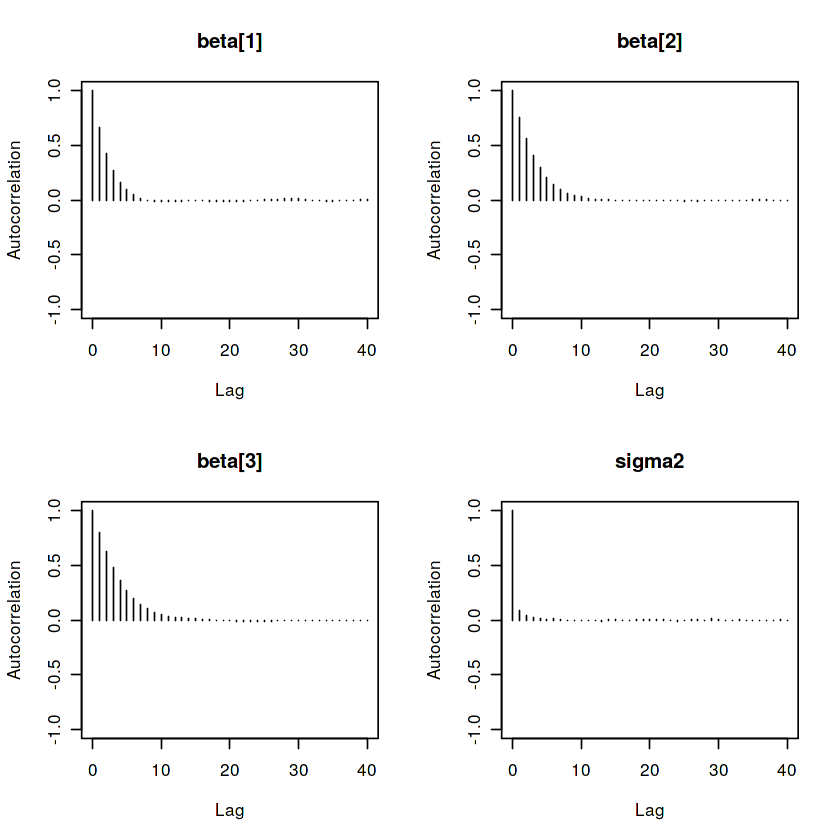

In [26]:
#autocorrelation plot
autocorr.plot(resn)


In [27]:
#Effective sample sizes
effectiveSize(resn[[1]])


beta[1]   beta[2]   beta[3]    sigma2 
11859.041  7830.064  6707.357 37964.820

In [28]:
#Creating robust model with t_5 errors
model_string <- "model{
# Likelihood
for(i in 1:n){
y[i]~dt(mu[i],tau,nu)
mu[i]=beta[1]+beta[2]*climb[i]+beta[3]*dist[i]
}

# Prior for beta
for(j in 1:3){
beta[j]~dnorm(mu0,tau0)
}
tau0=1/sigma02

# Prior for the inverse variance
tau~dgamma(a, b)

# Compute the variance
sigma2=1/tau
}"


mu0=0; sigma02=1000; a=0.1; b=0.1; nu=5
data=list(y=y,climb=climb,dist=dist,n=n,mu0=mu0,sigma02=sigma02,a=a,b=b,nu=nu)
model=jags.model(textConnection(model_string),n.chains=1,data=data)
update(model,10000,progress.bar="none")
rest=coda.samples(model,variable.names=c("beta","sigma2"),n.iter=50000,thin=1,progress.bar="none")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 35
   Unobserved stochastic nodes: 4
   Total graph size: 194

Initializing model



In [29]:
summary(rest)


Iterations = 11001:61000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 50000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean        SD  Naive SE Time-series SE
beta[1] -9.550573  2.356875 1.054e-02      0.0313256
beta[2]  0.008107  0.001547 6.918e-06      0.0000248
beta[3]  6.568402  0.307644 1.376e-03      0.0046429
sigma2  43.377910 17.609027 7.875e-02      0.1530651

2. Quantiles for each variable:

              2.5%       25%       50%       75%    97.5%
beta[1] -14.397446 -11.03741 -9.466348 -7.986012 -5.10708
beta[2]   0.005385   0.00704  0.007993  0.009027  0.01153
beta[3]   5.926244   6.38295  6.577406  6.763346  7.15991
sigma2   19.594758  31.06083 39.866251 51.772247 86.92973


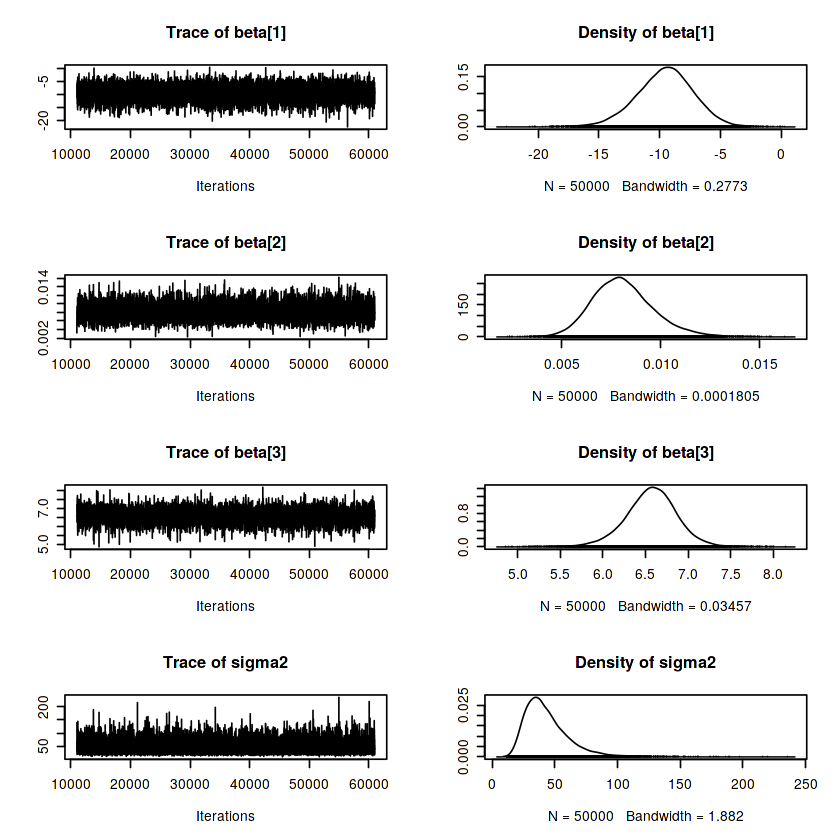

In [30]:
plot(rest)

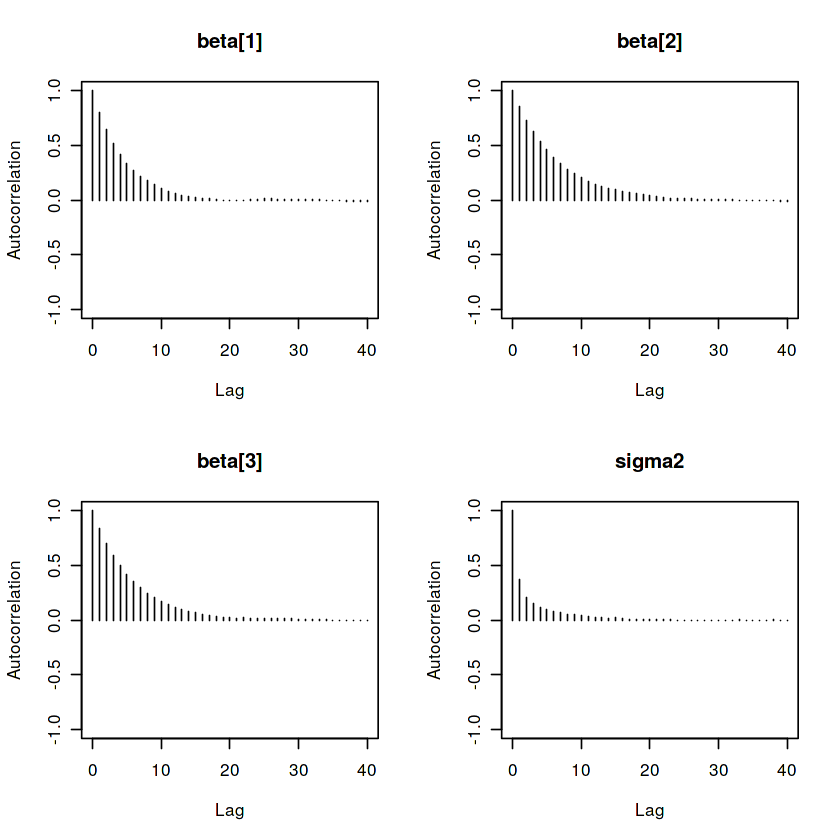

In [31]:
autocorr.plot(rest)

In [32]:
effectiveSize(rest)

beta[1]   beta[2]   beta[3]    sigma2 
 5660.744  3890.722  4390.615 13234.831

In [33]:

#Creating third model with t errors but prior on degrees of freedom, 
#instead of degrees of freedom fixed at 5 as in the last model
model_string <- "model{
# Likelihood
for(i in 1:n){
y[i]~dt(mu[i],tau,nu)
mu[i]=beta[1]+beta[2]*climb[i]+beta[3]*dist[i]
}

# Prior for beta
for(j in 1:3){
beta[j]~dnorm(mu0,tau0)
}
tau0=1/sigma02

# Prior for the inverse variance
tau~dgamma(a, b)

# Compute the variance
sigma2=1/tau

#Prior for nu
nu~dgamma(c,d)
}"


mu0=0; sigma02=1000; a=0.1; b=0.1; c=0.1; d=0.1
data=list(y=y,climb=climb,dist=dist,n=n,mu0=mu0,sigma02=sigma02,a=a,b=b,c=c,d=d)
model=jags.model(textConnection(model_string),n.chains=1,data=data)
update(model,10000,progress.bar="none")
restnu=coda.samples(model,variable.names=c("beta","sigma2","nu"),n.iter=50000,thin=1,progress.bar="none")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 35
   Unobserved stochastic nodes: 5
   Total graph size: 196

Initializing model



In [34]:
summary(restnu)


Iterations = 11001:61000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 50000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

             Mean       SD  Naive SE Time-series SE
beta[1] -8.080109 1.914278 8.561e-03      3.037e-02
beta[2]  0.006914 0.001062 4.748e-06      1.624e-05
beta[3]  6.549036 0.278951 1.248e-03      5.357e-03
nu       1.476658 0.524926 2.348e-03      5.069e-03
sigma2  16.011505 8.555809 3.826e-02      7.930e-02

2. Quantiles for each variable:

              2.5%      25%       50%       75%     97.5%
beta[1] -11.822364 -9.31068 -8.094458 -6.883939 -4.177881
beta[2]   0.005016  0.00622  0.006839  0.007531  0.009229
beta[3]   5.874994  6.42270  6.588764  6.718819  6.997573
nu        0.717462  1.10727  1.388657  1.744349  2.762289
sigma2    4.791146 10.12420 14.292448 19.897614 37.326319


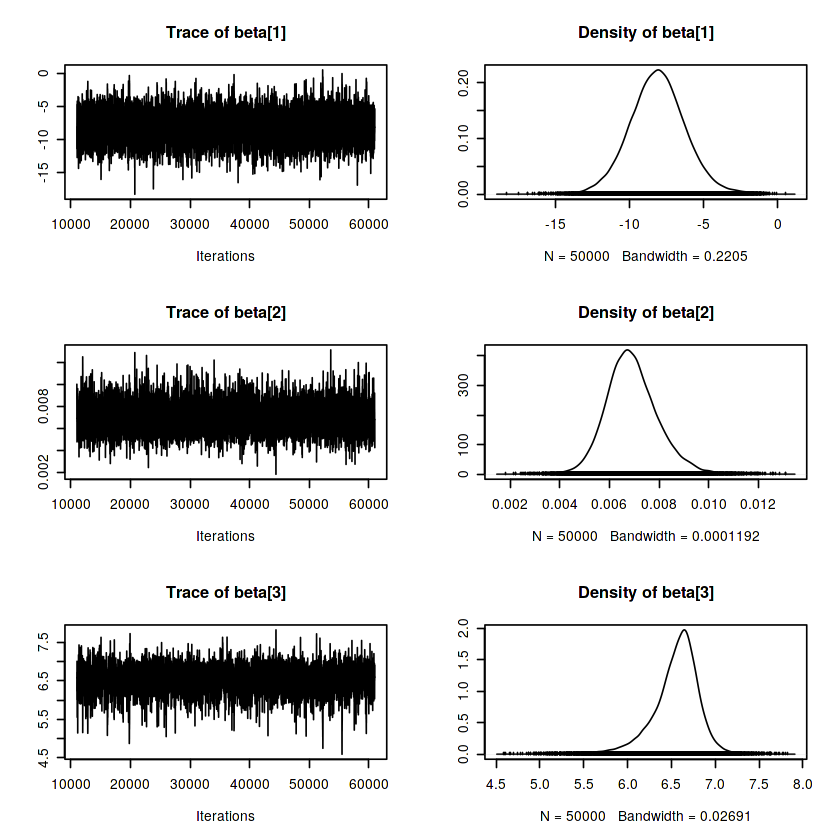

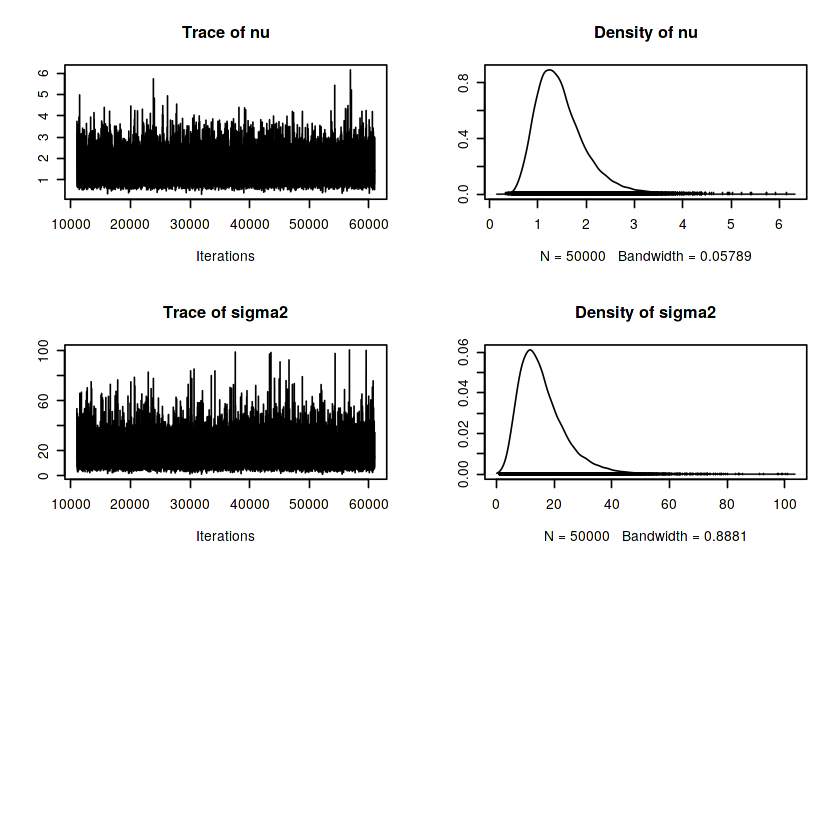

In [35]:
plot(restnu)

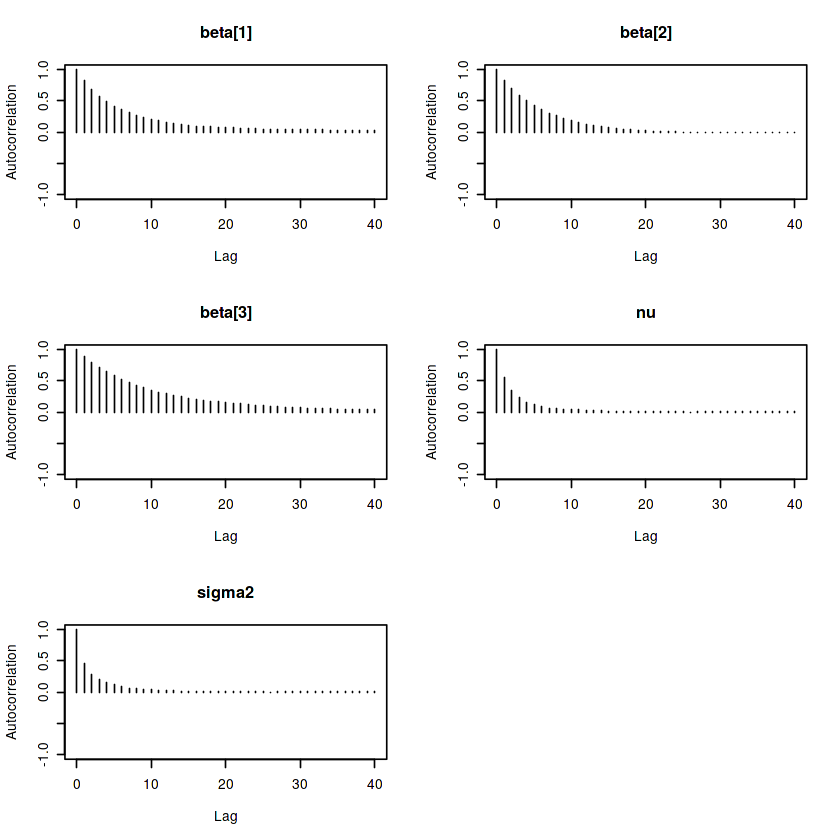

In [36]:
autocorr.plot(restnu)

In [37]:
effectiveSize(restnu)

beta[1]   beta[2]   beta[3]        nu    sigma2 
 3974.062  4274.064  2711.399 10723.812 11639.548